# Collaboration and Competition

---
## DRL Project 3

Qian Sun

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.16 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. My Implementation

Firstly, we import some necessary dependencies.

In [5]:
import gym, random, torch, time
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [6]:
# choose the random state to be 72
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=72)

In [7]:
def ddpg(n_episodes=5000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=100)
    scores = []
    start_time = time.time()
    for i_episode in range(1, n_episodes+1):
        current_scores = np.zeros(num_agents) 
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            agent.step(states=states, actions=actions, rewards=rewards, next_states=next_states, dones=dones)
            current_scores += np.array(rewards)
            states = next_states
            if np.any(dones):
                break

        score = np.max(current_scores)
        scores_deque.append(score)
        scores.append(score)
        average_score = np.mean(scores_deque)
        
        if i_episode % print_every == 0:
            duration = time.time() - start_time
            print('\rEpisode {} ({}s)\tAverage Score: {:.2f} \tMax Bin Score: {:.2f}'.format(i_episode, int(duration), average_score, np.mean(scores[-print_every:])))
            start_time = time.time()
        if average_score >= 0.5:
            print('\nEnvironment solved in {} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, average_score))
            torch.save(agent.actor_local.state_dict(), 'actor.pth')
            torch.save(agent.critic_local.state_dict(), 'critic.pth')
            break
    return scores

In [8]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

Episode 100 (44s)	Average Score: 0.00 	Max Bin Score: 0.00
Episode 200 (47s)	Average Score: 0.00 	Max Bin Score: 0.00
Episode 300 (49s)	Average Score: 0.00 	Max Bin Score: 0.00
Episode 400 (50s)	Average Score: 0.01 	Max Bin Score: 0.01
Episode 500 (48s)	Average Score: 0.00 	Max Bin Score: 0.00
Episode 600 (61s)	Average Score: 0.02 	Max Bin Score: 0.02
Episode 700 (259s)	Average Score: 0.20 	Max Bin Score: 0.20
Episode 800 (561s)	Average Score: 0.42 	Max Bin Score: 0.42

Environment solved in 706 episodes!	Average Score: 0.50
Runtime (in seconds) 1247


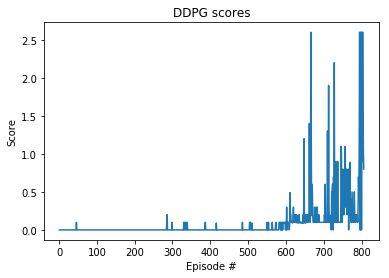

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

### Misc: Some failed/unfinished trials with other paramter sets

Lucky me! Essentially I'm reusing the parameter sets from Project 2 Continuous Control, and it solves the problem in just one run!